<a href="https://colab.research.google.com/github/Jose897/ARSAT/blob/feature1/Parte_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Parte 1** 

In [5]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

In [6]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [7]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [8]:
#Datos en https://www.drivendata.org/competitions/57/nepal-earthquake/data/
id= '1rIkecZnYLL1JgDDltz_QaiUU-srwExAq'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('train_values.csv')

In [9]:
#Datos en https://www.drivendata.org/competitions/57/nepal-earthquake/data/
id='1y0_UGco6sKk7VmgyX7_juWe6gyulHnjM'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('train_labels.csv')

In [10]:
valores=pd.read_csv('train_values.csv')
valores

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,n,f,j,s,q,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
260597,669485,17,715,2060,2,0,6,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
260598,602512,17,51,8163,3,55,6,7,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
260599,151409,26,39,1851,2,10,14,6,t,r,x,v,s,j,d,0,0,0,0,0,1,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [11]:
etiquetas=pd.read_csv('train_labels.csv')
etiquetas

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3
...,...,...
260596,688636,2
260597,669485,3
260598,602512,3
260599,151409,2


In [12]:
#
valores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [13]:
etiquetas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   building_id   260601 non-null  int64
 1   damage_grade  260601 non-null  int64
dtypes: int64(2)
memory usage: 4.0 MB


In [14]:
#Nos da las dimenciones del df (rows x columnas)
print(valores.shape)

(260601, 39)


In [15]:
print(etiquetas.shape)

(260601, 2)


In [16]:
#En caso de ser un df, devuelve rows x columnas
valores.size

10163439

In [17]:
etiquetas.size

521202

In [18]:
#Podemos contar la cantidad de elementos, elementos no nulos en el data frame
valores.count()

building_id                               260601
geo_level_1_id                            260601
geo_level_2_id                            260601
geo_level_3_id                            260601
count_floors_pre_eq                       260601
age                                       260601
area_percentage                           260601
height_percentage                         260601
land_surface_condition                    260601
foundation_type                           260601
roof_type                                 260601
ground_floor_type                         260601
other_floor_type                          260601
position                                  260601
plan_configuration                        260601
has_superstructure_adobe_mud              260601
has_superstructure_mud_mortar_stone       260601
has_superstructure_stone_flag             260601
has_superstructure_cement_mortar_stone    260601
has_superstructure_mud_mortar_brick       260601
has_superstructure_c

In [19]:
etiquetas.count()

building_id     260601
damage_grade    260601
dtype: int64

In [20]:
#Evaluo los tipos de datos de columnas
valores.dtypes.reset_index()

,index,0
0,building_id,int64
1,geo_level_1_id,int64
2,geo_level_2_id,int64
3,geo_level_3_id,int64
4,count_floors_pre_eq,int64
5,age,int64
6,area_percentage,int64
7,height_percentage,int64
8,land_surface_condition,object
9,foundation_type,object


In [21]:
#Filtro y elimino columnas categoricas ofuscadas
acotar_valores= valores.iloc[:,[0,1,2,3,4,5,6,7,15,16,17,18,19,20,21,22,23,24,25,27,28,29,30,31,32,33,34,35,36,37,38]]
acotar_valores

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
260597,669485,17,715,2060,2,0,6,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
260598,602512,17,51,8163,3,55,6,7,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
260599,151409,26,39,1851,2,10,14,6,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [22]:
acotar_valores.dtypes.reset_index()

,index,0
0,building_id,int64
1,geo_level_1_id,int64
2,geo_level_2_id,int64
3,geo_level_3_id,int64
4,count_floors_pre_eq,int64
5,age,int64
6,area_percentage,int64
7,height_percentage,int64
8,has_superstructure_adobe_mud,int64
9,has_superstructure_mud_mortar_stone,int64


In [23]:
#Substraigo mis 8 columnas
mis_valores= acotar_valores.iloc[:,[20,21,22,23,24,25,26,27,28,29,30]]
mis_valores

,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
260596,0,0,0,0,0,0,0,0,0,0,0
260597,0,0,0,0,0,0,0,0,0,0,0
260598,0,0,0,0,0,0,0,0,0,0,0
260599,0,0,0,0,0,0,0,0,0,0,0


In [24]:
mis_valores[mis_valores['has_secondary_use_rental']>0].count()

has_secondary_use                2111
has_secondary_use_agriculture    2111
has_secondary_use_hotel          2111
has_secondary_use_rental         2111
has_secondary_use_institution    2111
has_secondary_use_school         2111
has_secondary_use_industry       2111
has_secondary_use_health_post    2111
has_secondary_use_gov_office     2111
has_secondary_use_use_police     2111
has_secondary_use_other          2111
dtype: int64

In [25]:
mis_valores[mis_valores['has_secondary_use_institution']>0].count()

has_secondary_use                245
has_secondary_use_agriculture    245
has_secondary_use_hotel          245
has_secondary_use_rental         245
has_secondary_use_institution    245
has_secondary_use_school         245
has_secondary_use_industry       245
has_secondary_use_health_post    245
has_secondary_use_gov_office     245
has_secondary_use_use_police     245
has_secondary_use_other          245
dtype: int64

In [26]:
mis_valores[mis_valores['has_secondary_use_school']>0].count()

has_secondary_use                94
has_secondary_use_agriculture    94
has_secondary_use_hotel          94
has_secondary_use_rental         94
has_secondary_use_institution    94
has_secondary_use_school         94
has_secondary_use_industry       94
has_secondary_use_health_post    94
has_secondary_use_gov_office     94
has_secondary_use_use_police     94
has_secondary_use_other          94
dtype: int64

In [27]:
mis_valores[mis_valores['has_secondary_use_industry']>0].count()

has_secondary_use                279
has_secondary_use_agriculture    279
has_secondary_use_hotel          279
has_secondary_use_rental         279
has_secondary_use_institution    279
has_secondary_use_school         279
has_secondary_use_industry       279
has_secondary_use_health_post    279
has_secondary_use_gov_office     279
has_secondary_use_use_police     279
has_secondary_use_other          279
dtype: int64

In [28]:
mis_valores[mis_valores['has_secondary_use_health_post']>0].count()

has_secondary_use                49
has_secondary_use_agriculture    49
has_secondary_use_hotel          49
has_secondary_use_rental         49
has_secondary_use_institution    49
has_secondary_use_school         49
has_secondary_use_industry       49
has_secondary_use_health_post    49
has_secondary_use_gov_office     49
has_secondary_use_use_police     49
has_secondary_use_other          49
dtype: int64

In [29]:
mis_valores[mis_valores['has_secondary_use_gov_office']>0].count()

has_secondary_use                38
has_secondary_use_agriculture    38
has_secondary_use_hotel          38
has_secondary_use_rental         38
has_secondary_use_institution    38
has_secondary_use_school         38
has_secondary_use_industry       38
has_secondary_use_health_post    38
has_secondary_use_gov_office     38
has_secondary_use_use_police     38
has_secondary_use_other          38
dtype: int64

In [30]:
mis_valores[mis_valores['has_secondary_use_use_police']>0].count()

has_secondary_use                23
has_secondary_use_agriculture    23
has_secondary_use_hotel          23
has_secondary_use_rental         23
has_secondary_use_institution    23
has_secondary_use_school         23
has_secondary_use_industry       23
has_secondary_use_health_post    23
has_secondary_use_gov_office     23
has_secondary_use_use_police     23
has_secondary_use_other          23
dtype: int64

In [31]:
mis_valores[mis_valores['has_secondary_use_other']>0].count()

has_secondary_use                1334
has_secondary_use_agriculture    1334
has_secondary_use_hotel          1334
has_secondary_use_rental         1334
has_secondary_use_institution    1334
has_secondary_use_school         1334
has_secondary_use_industry       1334
has_secondary_use_health_post    1334
has_secondary_use_gov_office     1334
has_secondary_use_use_police     1334
has_secondary_use_other          1334
dtype: int64

In [32]:
#Columna no asignada
mis_valores[mis_valores['has_secondary_use_hotel']>0].count()

has_secondary_use                8763
has_secondary_use_agriculture    8763
has_secondary_use_hotel          8763
has_secondary_use_rental         8763
has_secondary_use_institution    8763
has_secondary_use_school         8763
has_secondary_use_industry       8763
has_secondary_use_health_post    8763
has_secondary_use_gov_office     8763
has_secondary_use_use_police     8763
has_secondary_use_other          8763
dtype: int64

In [33]:
#Columna no asignada
mis_valores[mis_valores['has_secondary_use_agriculture']>0].count()

has_secondary_use                16777
has_secondary_use_agriculture    16777
has_secondary_use_hotel          16777
has_secondary_use_rental         16777
has_secondary_use_institution    16777
has_secondary_use_school         16777
has_secondary_use_industry       16777
has_secondary_use_health_post    16777
has_secondary_use_gov_office     16777
has_secondary_use_use_police     16777
has_secondary_use_other          16777
dtype: int64

In [34]:
#Columna no asignada
mis_valores[mis_valores['has_secondary_use']>0].count()

has_secondary_use                29156
has_secondary_use_agriculture    29156
has_secondary_use_hotel          29156
has_secondary_use_rental         29156
has_secondary_use_institution    29156
has_secondary_use_school         29156
has_secondary_use_industry       29156
has_secondary_use_health_post    29156
has_secondary_use_gov_office     29156
has_secondary_use_use_police     29156
has_secondary_use_other          29156
dtype: int64

In [35]:
mis_valores[ (mis_valores['has_secondary_use_rental']>0) & (mis_valores['has_secondary_use_institution']>0) & (mis_valores['has_secondary_use_school']>0) & (mis_valores['has_secondary_use_industry']>0) & (mis_valores['has_secondary_use_health_post']>0) & (mis_valores['has_secondary_use_gov_office']>0) & (mis_valores['has_secondary_use_use_police']>0) & (mis_valores['has_secondary_use_other']>0) ].count()

has_secondary_use                0
has_secondary_use_agriculture    0
has_secondary_use_hotel          0
has_secondary_use_rental         0
has_secondary_use_institution    0
has_secondary_use_school         0
has_secondary_use_industry       0
has_secondary_use_health_post    0
has_secondary_use_gov_office     0
has_secondary_use_use_police     0
has_secondary_use_other          0
dtype: int64

In [36]:
mis_valores[ (mis_valores['has_secondary_use_rental']==0) & (mis_valores['has_secondary_use_institution']==0) & (mis_valores['has_secondary_use_school']==0) & (mis_valores['has_secondary_use_industry']==0) & (mis_valores['has_secondary_use_health_post']==0) & (mis_valores['has_secondary_use_gov_office']==0) & (mis_valores['has_secondary_use_use_police']==0) & (mis_valores['has_secondary_use_other']==0) & (mis_valores['has_secondary_use_hotel']==0) & (mis_valores['has_secondary_use_agriculture']==0) & (mis_valores['has_secondary_use']==0) ].count()

has_secondary_use                231445
has_secondary_use_agriculture    231445
has_secondary_use_hotel          231445
has_secondary_use_rental         231445
has_secondary_use_institution    231445
has_secondary_use_school         231445
has_secondary_use_industry       231445
has_secondary_use_health_post    231445
has_secondary_use_gov_office     231445
has_secondary_use_use_police     231445
has_secondary_use_other          231445
dtype: int64

In [37]:
cota_mis_valores= mis_valores[ (mis_valores['has_secondary_use_rental']==0) & (mis_valores['has_secondary_use_institution']==0) & (mis_valores['has_secondary_use_school']==0) & (mis_valores['has_secondary_use_industry']==0) & (mis_valores['has_secondary_use_health_post']==0) & (mis_valores['has_secondary_use_gov_office']==0) & (mis_valores['has_secondary_use_use_police']==0) & (mis_valores['has_secondary_use_other']==0) & (mis_valores['has_secondary_use_hotel']==0) & (mis_valores['has_secondary_use_agriculture']==0) & (mis_valores['has_secondary_use']==0) ]
cota_mis_valores

,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
260596,0,0,0,0,0,0,0,0,0,0,0
260597,0,0,0,0,0,0,0,0,0,0,0
260598,0,0,0,0,0,0,0,0,0,0,0
260599,0,0,0,0,0,0,0,0,0,0,0


In [38]:
cota_mis_valores[cota_mis_valores['has_secondary_use']>0].count()

has_secondary_use                0
has_secondary_use_agriculture    0
has_secondary_use_hotel          0
has_secondary_use_rental         0
has_secondary_use_institution    0
has_secondary_use_school         0
has_secondary_use_industry       0
has_secondary_use_health_post    0
has_secondary_use_gov_office     0
has_secondary_use_use_police     0
has_secondary_use_other          0
dtype: int64

In [39]:
cota_mis_valores.count()

has_secondary_use                231445
has_secondary_use_agriculture    231445
has_secondary_use_hotel          231445
has_secondary_use_rental         231445
has_secondary_use_institution    231445
has_secondary_use_school         231445
has_secondary_use_industry       231445
has_secondary_use_health_post    231445
has_secondary_use_gov_office     231445
has_secondary_use_use_police     231445
has_secondary_use_other          231445
dtype: int64

In [40]:
df_valores= etiquetas.merge(valores, how='inner')
df_valores

,building_id,damage_grade,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,3,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,28830,2,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
2,94947,3,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,590882,2,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
4,201944,3,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,2,25,1335,1621,1,55,6,3,n,r,n,f,j,s,q,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
260597,669485,3,17,715,2060,2,0,6,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
260598,602512,3,17,51,8163,3,55,6,7,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
260599,151409,2,26,39,1851,2,10,14,6,t,r,x,v,s,j,d,0,0,0,0,0,1,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [41]:
#Substraigo registros con algun 1
df_valores_validos= df_valores[ (df_valores['has_secondary_use_rental']==1) | (df_valores['has_secondary_use_institution']==1) | (df_valores['has_secondary_use_school']==1) | (df_valores['has_secondary_use_industry']==1) | (df_valores['has_secondary_use_health_post']==1) | (df_valores['has_secondary_use_gov_office']==1) | (df_valores['has_secondary_use_use_police']==1) | (df_valores['has_secondary_use_other']==1) | (df_valores['has_secondary_use_hotel']==1) | (df_valores['has_secondary_use_agriculture']==1) | (df_valores['has_secondary_use']==1) ].reset_index()
df_valores_validos

,index,building_id,damage_grade,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,5,333020,2,8,558,6089,2,10,9,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,1,1,0,0,0,0,0,0,0,0,0
1,20,793397,2,27,216,12323,3,40,7,5,t,r,n,f,q,j,d,1,0,0,0,0,0,0,0,0,0,0,v,0,1,1,0,0,0,0,0,0,0,0,0
2,26,973909,2,7,1328,5612,3,10,11,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,1,1,0,0,0,0,0,0,0,0,0
3,45,440102,1,7,157,5265,1,5,11,3,n,i,x,v,j,t,d,0,0,0,0,0,0,0,0,1,0,0,v,2,1,0,0,1,0,0,0,0,0,0,0
4,57,552720,2,30,73,12532,2,45,10,5,n,r,n,f,q,s,u,0,1,0,0,0,0,0,0,0,0,0,v,1,1,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29151,260579,977263,2,8,696,4415,2,995,4,5,t,r,n,f,q,s,d,0,1,0,0,0,0,1,0,0,0,0,v,1,1,1,0,0,0,0,0,0,0,0,0
29152,260584,317439,3,30,106,3085,2,20,8,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,1,1,0,0,0,0,0,0,0,0,0
29153,260587,603159,3,8,696,4513,3,20,7,9,t,r,n,f,q,s,d,0,1,0,0,0,0,1,0,0,0,0,v,1,1,1,0,0,0,0,0,0,0,0,0
29154,260591,560805,3,20,368,5980,1,25,5,3,n,r,n,f,j,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,1,1,0,0,0,0,0,0,0,0,0


In [42]:
#Substraigo registros con todo 0
df_valores_nulos= df_valores[ (df_valores['has_secondary_use_rental']==0) & (df_valores['has_secondary_use_institution']==0) & (df_valores['has_secondary_use_school']==0) & (df_valores['has_secondary_use_industry']==0) & (df_valores['has_secondary_use_health_post']==0) & (df_valores['has_secondary_use_gov_office']==0) & (df_valores['has_secondary_use_use_police']==0) & (df_valores['has_secondary_use_other']==0) & (df_valores['has_secondary_use_hotel']==0) & (df_valores['has_secondary_use_agriculture']==0) & (df_valores['has_secondary_use']==0) ].reset_index()
df_valores_nulos
#Osea : (29155+1) + (231445+1) = 260601 registros el total

,index,building_id,damage_grade,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,0,802906,3,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,1,28830,2,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
2,2,94947,3,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,3,590882,2,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
4,4,201944,3,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231440,260596,688636,2,25,1335,1621,1,55,6,3,n,r,n,f,j,s,q,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
231441,260597,669485,3,17,715,2060,2,0,6,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
231442,260598,602512,3,17,51,8163,3,55,6,7,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
231443,260599,151409,2,26,39,1851,2,10,14,6,t,r,x,v,s,j,d,0,0,0,0,0,1,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [43]:
df_valores_validos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29156 entries, 0 to 29155
Data columns (total 41 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   index                                   29156 non-null  int64 
 1   building_id                             29156 non-null  int64 
 2   damage_grade                            29156 non-null  int64 
 3   geo_level_1_id                          29156 non-null  int64 
 4   geo_level_2_id                          29156 non-null  int64 
 5   geo_level_3_id                          29156 non-null  int64 
 6   count_floors_pre_eq                     29156 non-null  int64 
 7   age                                     29156 non-null  int64 
 8   area_percentage                         29156 non-null  int64 
 9   height_percentage                       29156 non-null  int64 
 10  land_surface_condition                  29156 non-null  object
 11  fo

In [44]:
#Filtro y elimino columnas categoricas ofuscadas
#Obtengo 29156 registros con valor en uso del edificio
df_columnas_validas= df_valores_validos.iloc[:,[1,2,3,4,5,6,7,8,9,17,18,19,20,21,22,23,24,25,26,27,29,30,31,32,33,34,35,36,37,38,39,40]]
df_columnas_validas

,building_id,damage_grade,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,333020,2,8,558,6089,2,10,9,5,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0
1,793397,2,27,216,12323,3,40,7,5,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
2,973909,2,7,1328,5612,3,10,11,5,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0
3,440102,1,7,157,5265,1,5,11,3,0,0,0,0,0,0,0,0,1,0,0,2,1,0,0,1,0,0,0,0,0,0,0
4,552720,2,30,73,12532,2,45,10,5,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29151,977263,2,8,696,4415,2,995,4,5,0,1,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0
29152,317439,3,30,106,3085,2,20,8,5,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0
29153,603159,3,8,696,4513,3,20,7,9,0,1,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0
29154,560805,3,20,368,5980,1,25,5,3,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0


In [45]:
df_columnas_validas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29156 entries, 0 to 29155
Data columns (total 32 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   building_id                             29156 non-null  int64
 1   damage_grade                            29156 non-null  int64
 2   geo_level_1_id                          29156 non-null  int64
 3   geo_level_2_id                          29156 non-null  int64
 4   geo_level_3_id                          29156 non-null  int64
 5   count_floors_pre_eq                     29156 non-null  int64
 6   age                                     29156 non-null  int64
 7   area_percentage                         29156 non-null  int64
 8   height_percentage                       29156 non-null  int64
 9   has_superstructure_adobe_mud            29156 non-null  int64
 10  has_superstructure_mud_mortar_stone     29156 non-null  int64
 11  has_superstruct

In [79]:
df_achicar_columnas= df_columnas_validas.iloc[:,[1,21,22,23,24,25,26,27,28,29,30,31]]
df_achicar_columnas

,damage_grade,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,2,1,1,0,0,0,0,0,0,0,0,0
1,2,1,1,0,0,0,0,0,0,0,0,0
2,2,1,1,0,0,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,0,0
4,2,1,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
29151,2,1,1,0,0,0,0,0,0,0,0,0
29152,3,1,1,0,0,0,0,0,0,0,0,0
29153,3,1,1,0,0,0,0,0,0,0,0,0
29154,3,1,1,0,0,0,0,0,0,0,0,0


In [81]:
#agrupo por daño y sumo colegio de columnas colegio
df_grupo= df_achicar_columnas.groupby(['damage_grade']).sum().reset_index()
df_grupo

,damage_grade,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,1,4248,829,2216,877,99,30,59,12,13,4,175
1,2,17715,10679,5058,1051,129,47,152,32,21,12,852
2,3,7193,5269,1489,183,17,17,68,5,4,7,307


In [82]:
df_grupo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   damage_grade                   3 non-null      int64
 1   has_secondary_use              3 non-null      int64
 2   has_secondary_use_agriculture  3 non-null      int64
 3   has_secondary_use_hotel        3 non-null      int64
 4   has_secondary_use_rental       3 non-null      int64
 5   has_secondary_use_institution  3 non-null      int64
 6   has_secondary_use_school       3 non-null      int64
 7   has_secondary_use_industry     3 non-null      int64
 8   has_secondary_use_health_post  3 non-null      int64
 9   has_secondary_use_gov_office   3 non-null      int64
 10  has_secondary_use_use_police   3 non-null      int64
 11  has_secondary_use_other        3 non-null      int64
dtypes: int64(12)
memory usage: 416.0 bytes


### Muestro grafico general

In [129]:
df_grupo_edificios= df_grupo.iloc[:,[1,2,3,4,5,6,7,8,9,10,11]]
df_grupo_edificios

,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,4248,829,2216,877,99,30,59,12,13,4,175
1,17715,10679,5058,1051,129,47,152,32,21,12,852
2,7193,5269,1489,183,17,17,68,5,4,7,307


In [130]:
#TODOS LOS USOS SECUNDARIOS

df_edificios_totales= df_grupo_edificios.T.reset_index()
df_edificios_totales

,index,0,1,2
0,has_secondary_use,4248,17715,7193
1,has_secondary_use_agriculture,829,10679,5269
2,has_secondary_use_hotel,2216,5058,1489
3,has_secondary_use_rental,877,1051,183
4,has_secondary_use_institution,99,129,17
5,has_secondary_use_school,30,47,17
6,has_secondary_use_industry,59,152,68
7,has_secondary_use_health_post,12,32,5
8,has_secondary_use_gov_office,13,21,4
9,has_secondary_use_use_police,4,12,7


In [131]:
df_edificios_totales_renombre= df_edificios_totales.rename(columns={'index':'categoria',0:'1',1:'2',2:'3'})
df_edificios_totales_renombre

,categoria,1,2,3
0,has_secondary_use,4248,17715,7193
1,has_secondary_use_agriculture,829,10679,5269
2,has_secondary_use_hotel,2216,5058,1489
3,has_secondary_use_rental,877,1051,183
4,has_secondary_use_institution,99,129,17
5,has_secondary_use_school,30,47,17
6,has_secondary_use_industry,59,152,68
7,has_secondary_use_health_post,12,32,5
8,has_secondary_use_gov_office,13,21,4
9,has_secondary_use_use_police,4,12,7


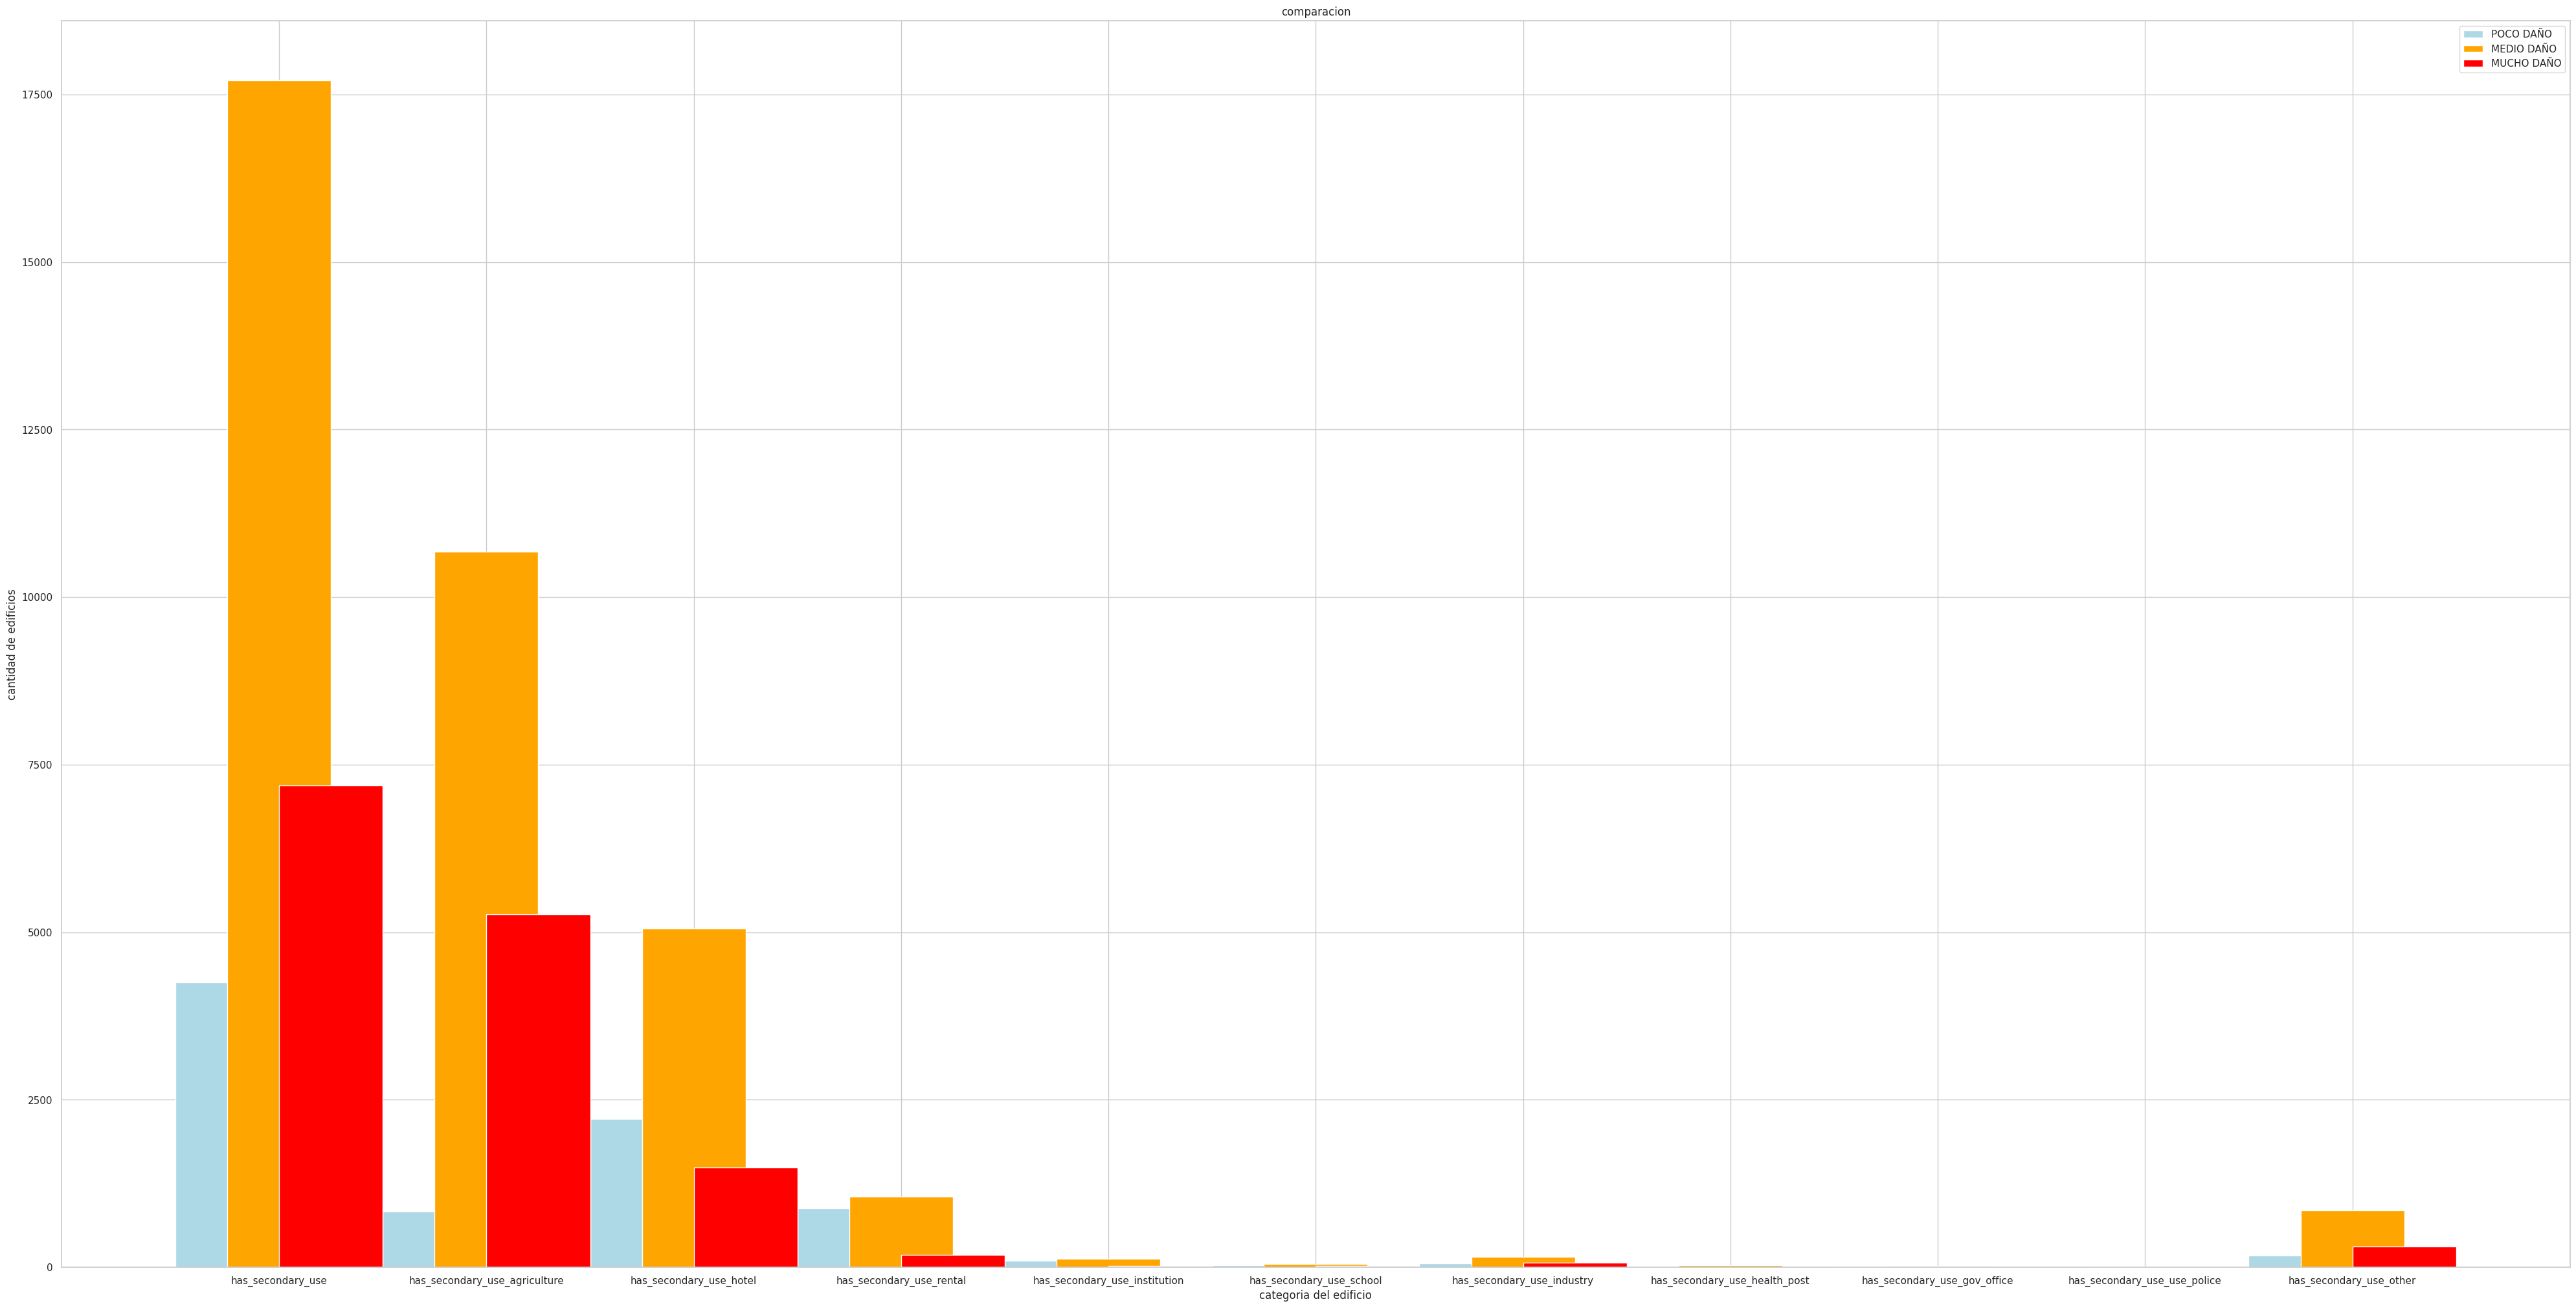

In [134]:
#DIAGRAMA
fig = plt.figure(figsize = (50,25))
plt.bar(df_edificios_totales_renombre['categoria'],df_edificios_totales_renombre['1'], label= 'POCO DAÑO',width=-0.5,align='edge', color='lightblue')
plt.bar(df_edificios_totales_renombre['categoria'],df_edificios_totales_renombre['2'], label= 'MEDIO DAÑO',width=0.5,align='center', color='orange')
plt.bar(df_edificios_totales_renombre['categoria'],df_edificios_totales_renombre['3'], label= 'MUCHO DAÑO',width=0.5,align='edge', color='red')

plt.title('comparacion')

plt.ylabel('cantidad de edificios')
plt.xlabel('categoria del edificio')
plt.legend()
plt.show()

### Separo las categoria en 3 grupos y comparo

In [106]:
df_muchos_edificios= df_grupo.iloc[:,[1,2,3]]
df_muchos_edificios

,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel
0,4248,829,2216
1,17715,10679,5058
2,7193,5269,1489


In [107]:
df_medio_edificios= df_grupo.iloc[:,[4,7,11]]
df_medio_edificios

,has_secondary_use_rental,has_secondary_use_industry,has_secondary_use_other
0,877,59,175
1,1051,152,852
2,183,68,307


In [108]:
df_pocos_edificios= df_grupo.iloc[:,[5,6,8,9,10]]
df_pocos_edificios

,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police
0,99,30,12,13,4
1,129,47,32,21,12
2,17,17,5,4,7


In [111]:
df_edificios_muchos= df_muchos_edificios.T.reset_index()
df_edificios_muchos

,index,0,1,2
0,has_secondary_use,4248,17715,7193
1,has_secondary_use_agriculture,829,10679,5269
2,has_secondary_use_hotel,2216,5058,1489


In [112]:
df_edificios_muchos_renombre= df_edificios_muchos.rename(columns={'index':'categoria',0:'1',1:'2',2:'3'})
df_edificios_muchos_renombre

,categoria,1,2,3
0,has_secondary_use,4248,17715,7193
1,has_secondary_use_agriculture,829,10679,5269
2,has_secondary_use_hotel,2216,5058,1489


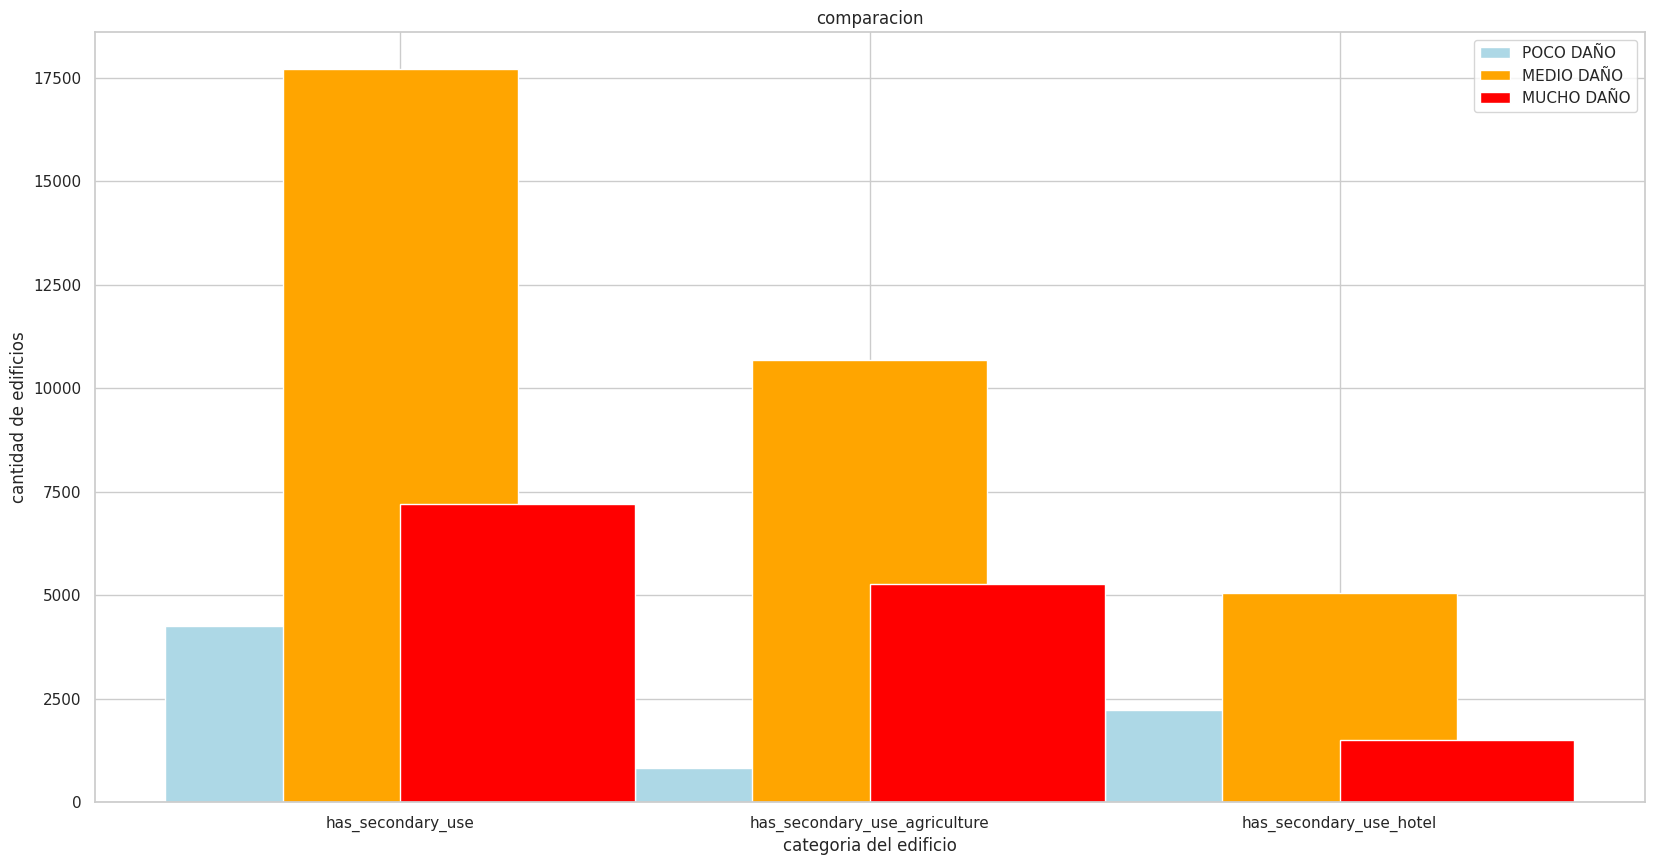

In [135]:
#DIAGRAMA
fig = plt.figure(figsize = (20,10))
plt.bar(df_edificios_muchos_renombre['categoria'],df_edificios_muchos_renombre['1'], label= 'POCO DAÑO',width=-0.5,align='edge', color='lightblue')
plt.bar(df_edificios_muchos_renombre['categoria'],df_edificios_muchos_renombre['2'], label= 'MEDIO DAÑO',width=0.5,align='center', color='orange')
plt.bar(df_edificios_muchos_renombre['categoria'],df_edificios_muchos_renombre['3'], label= 'MUCHO DAÑO',width=0.5,align='edge', color='red')

plt.title('comparacion')

plt.ylabel('cantidad de edificios')
plt.xlabel('categoria del edificio')
plt.legend()
plt.show()

In [115]:
df_edificios_medio= df_medio_edificios.T.reset_index()
df_edificios_medio

,index,0,1,2
0,has_secondary_use_rental,877,1051,183
1,has_secondary_use_industry,59,152,68
2,has_secondary_use_other,175,852,307


In [116]:
df_edificios_medio_renombre= df_edificios_medio.rename(columns={'index':'categoria',0:'1',1:'2',2:'3'})
df_edificios_medio_renombre

,categoria,1,2,3
0,has_secondary_use_rental,877,1051,183
1,has_secondary_use_industry,59,152,68
2,has_secondary_use_other,175,852,307


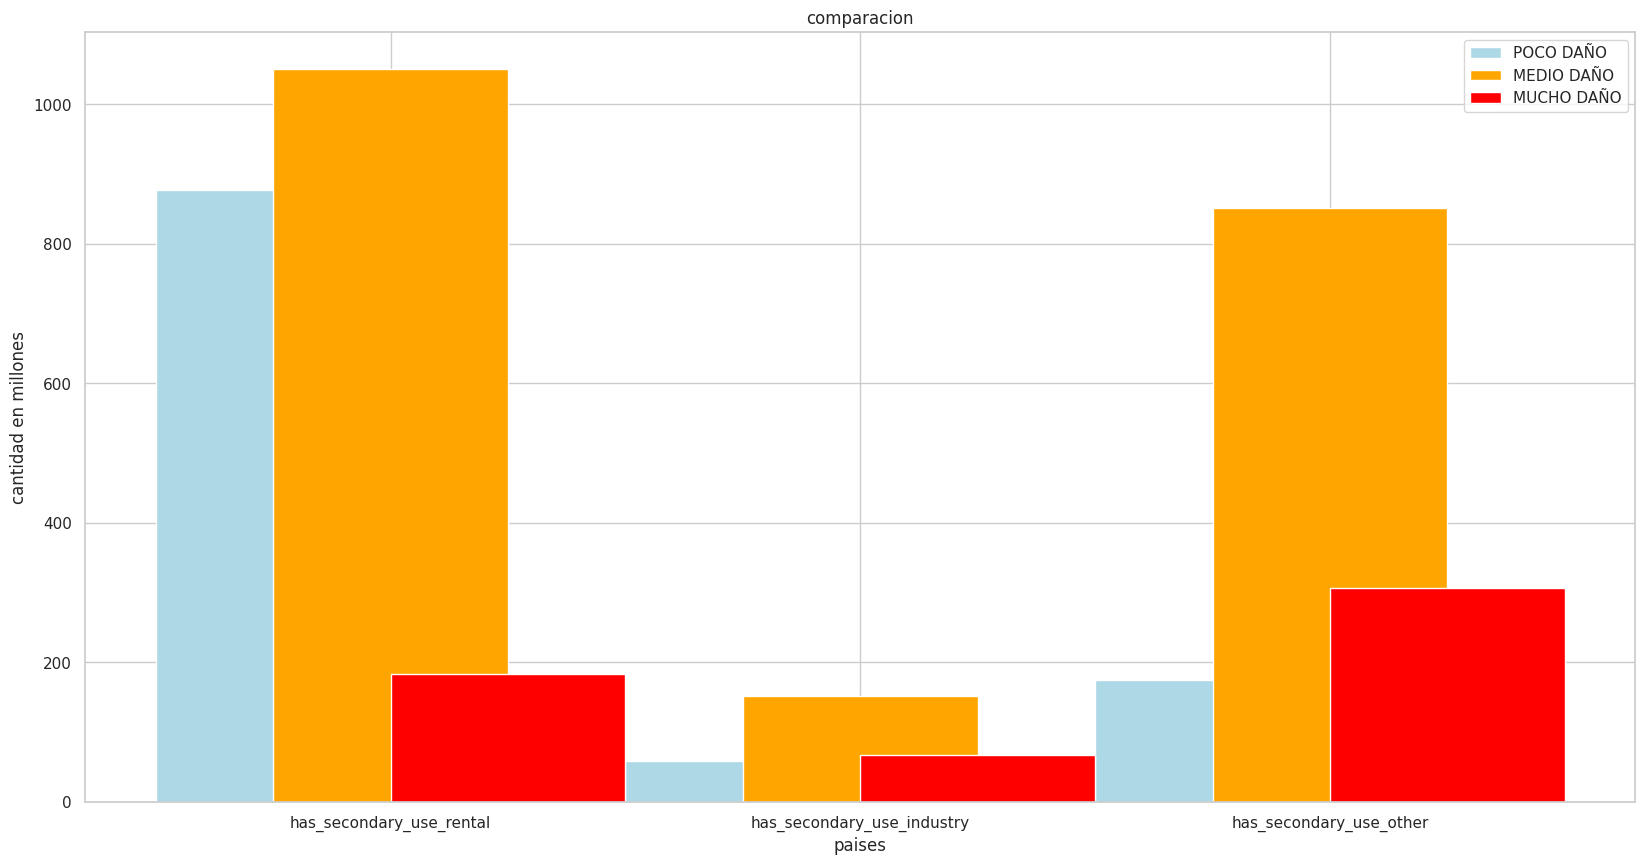

In [117]:
#DIAGRAMA
fig = plt.figure(figsize = (20,10))
plt.bar(df_edificios_medio_renombre['categoria'],df_edificios_medio_renombre['1'], label= 'POCO DAÑO',width=-0.5,align='edge', color='lightblue')
plt.bar(df_edificios_medio_renombre['categoria'],df_edificios_medio_renombre['2'], label= 'MEDIO DAÑO',width=0.5,align='center', color='orange')
plt.bar(df_edificios_medio_renombre['categoria'],df_edificios_medio_renombre['3'], label= 'MUCHO DAÑO',width=0.5,align='edge', color='red')

plt.title('comparacion')

plt.ylabel('cantidad de edificios')
plt.xlabel('categoria del edificio')
plt.legend()
plt.show()

In [118]:
df_edificios_pocos= df_pocos_edificios.T.reset_index()
df_edificios_pocos

,index,0,1,2
0,has_secondary_use_institution,99,129,17
1,has_secondary_use_school,30,47,17
2,has_secondary_use_health_post,12,32,5
3,has_secondary_use_gov_office,13,21,4
4,has_secondary_use_use_police,4,12,7


In [119]:
df_edificios_pocos_renombre= df_edificios_pocos.rename(columns={'index':'categoria',0:'1',1:'2',2:'3'})
df_edificios_pocos_renombre

,categoria,1,2,3
0,has_secondary_use_institution,99,129,17
1,has_secondary_use_school,30,47,17
2,has_secondary_use_health_post,12,32,5
3,has_secondary_use_gov_office,13,21,4
4,has_secondary_use_use_police,4,12,7


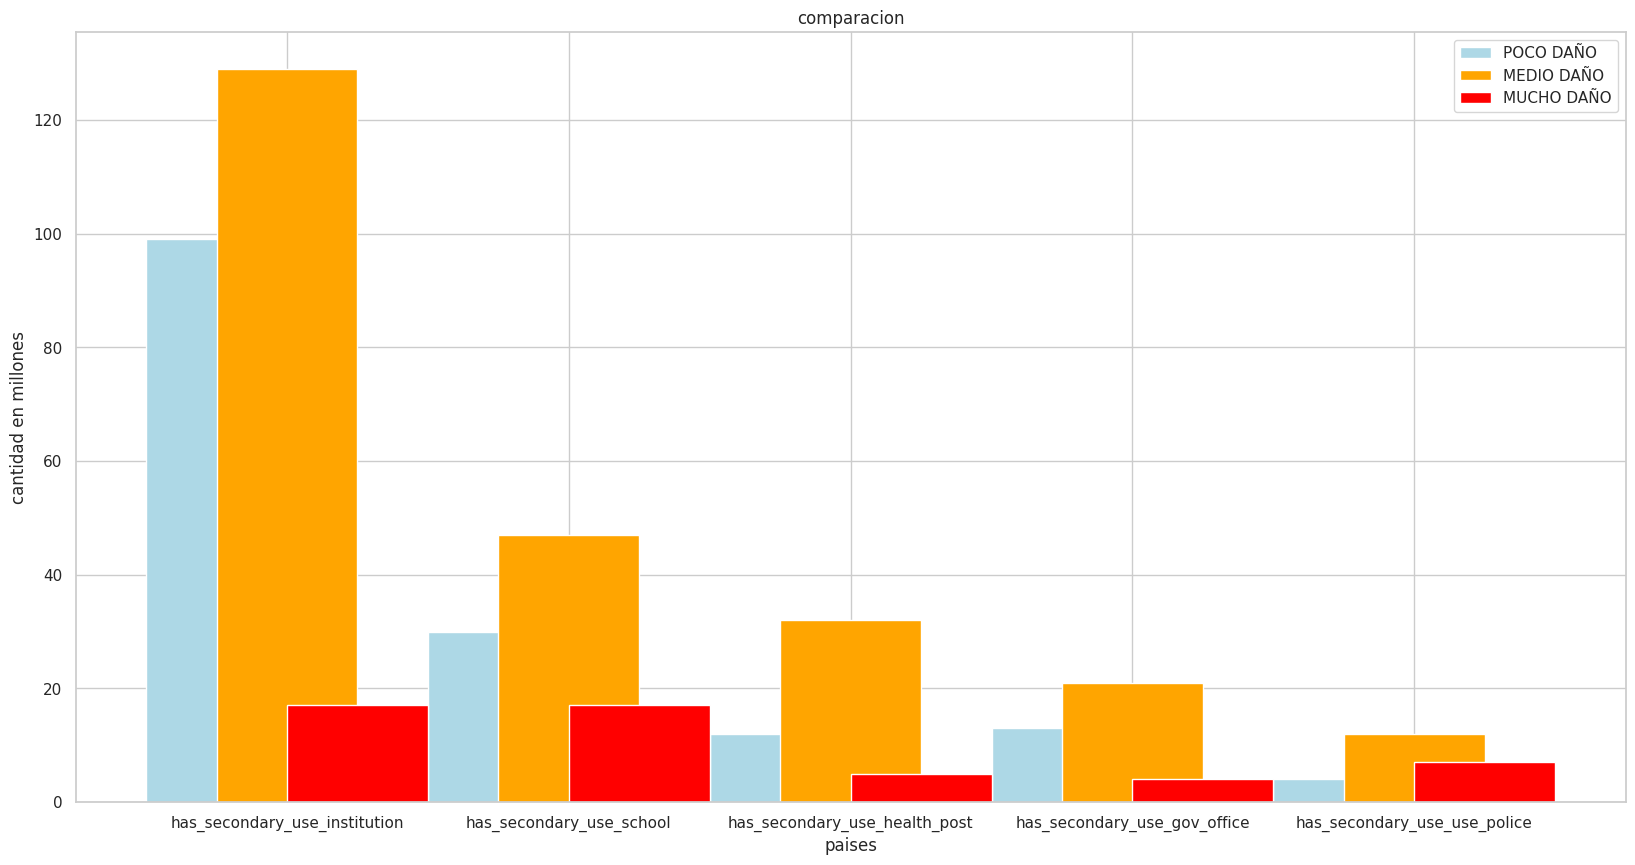

In [120]:
#DIAGRAMA
fig = plt.figure(figsize = (20,10))
plt.bar(df_edificios_pocos_renombre['categoria'],df_edificios_pocos_renombre['1'], label= 'POCO DAÑO',width=-0.5,align='edge', color='lightblue')
plt.bar(df_edificios_pocos_renombre['categoria'],df_edificios_pocos_renombre['2'], label= 'MEDIO DAÑO',width=0.5,align='center', color='orange')
plt.bar(df_edificios_pocos_renombre['categoria'],df_edificios_pocos_renombre['3'], label= 'MUCHO DAÑO',width=0.5,align='edge', color='red')

plt.title('comparacion')

plt.ylabel('cantidad de edificios')
plt.xlabel('categoria del edificio')
plt.legend()
plt.show()